## Kladd oppgave a

In [1]:
import pandas as pd

In [2]:
df_full = pd.read_csv("../data/compas-scores-two-years.csv")

In [3]:
display (df_full) # vi kaller den df_full, fordi vi senere i oppgaven skal endre på datasettet og vi trenger å kunne
# referere til begge datasettene. 

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [4]:
df_full.columns  # viser ALLE kolonner

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [5]:
#trenger ikke bruke alle kolonner. Lager derfor ny df. Lager det ved å skrive pd.dataframe
#dictionary som viser at dataene til kolonne sex ligger i kolonne sex, ved å referere til 
# gammel dataframe df_full. Får under her tilgang på hvit-ikkehvit i binære verdiene. 
# scorene fra 1-10 vet vi fra før at deles inn i low, medium og high. Fra oppgaveteksten 
# vet vi at medium og high er en felles kategori. Vi har med det bare to kategorier, og pedicted blir
# dermed true false likevel.

df = pd.DataFrame({ 
    "sex": df_full.sex, #kaller kolonne"
    "white": df_full.race == "Caucasian", #har i tillegg definert at enten er den lik eller ikke lik hvit
    "predicted_score": df_full.decile_score, #kaller kolonnen som allerede er der 
    "predicted": df_full.score_text != "Low", #hvis den ikke er low, da er den sann, og det 
    "actual": df_full.is_recid == 1, #ˆbetyr at de er predikert til å begå lovbrudd
})  #ˆom de begår lovbrudd eller ikke på actual. Vil også ha true og false her, 1 er sann

df

,sex,white,predicted_score,predicted,actual
0,Male,False,1,False,False
1,Male,False,3,False,True
2,Male,False,4,False,True
3,Male,False,8,True,False
4,Male,False,1,False,False
...,...,...,...,...,...
7209,Male,False,7,True,False
7210,Male,False,3,False,False
7211,Male,False,1,False,False
7212,Female,False,2,False,False


In [6]:
#herunder henter vi ut alle som er hvite og teller dem. Vi henter også ut antallet som ble 
#predicted til å begå lovbrudd OG er hvite. Og så deler vi, for å finne prosenten av hvor mange
#hvite som vil begå lovbrudd gitt at de er hvite, det andre antallet på det første
#df og klammeparentes filtrerer på det som er inni

def get_relative_frequency(group, variable):
    group_size = len(df[group]) #bruker dataene fra kolonnen som er inni klammene til 
    #å filtrere radene, fordi vi vil bare ha de radene hvor group er true. Med len får 
    #vi på en måte størrelsen
    filterd_group_size = len(df[variable & group])
    return filterd_group_size/group_size

In [7]:
pd.DataFrame({
    "Predicted": [get_relative_frequency(df.white, df.predicted), get_relative_frequency(~df.white, df.predicted)],
     #dette er en liste med navn på radene. listen har to verdier. 
    #det er ulike måter å sende data inn, men vi bruker dict hvor nøkkelen er navnet på 
    #kollonnen og verdien er verdien til kollonnen. 
    "Actual": [get_relative_frequency(df.white, df.actual), get_relative_frequency(~df.white, df.actual)],
    
}, index = ["White", "Non-white"])

#for hvite predicted og hvite actual ser vi ovenfor at det var flere som ble predicted enn det var
#actual, og på ikke-hvite så er tallet ganske likt. Dette er det vi vet hittil. Nå vil vi 
#lage en fin tabell. Da må vi ha ny dataframe. Vi vil ha hvit og ikke-hvit som rader,
#og predicted og actual som kolonner. Lager da dataframe med dict. 

,Predicted,Actual
White,0.348003,0.417685
Non-white,0.517437,0.513866


In [8]:
#herunder gjør vi det samme for å finne i forhold til kjønn. lager ny dataframe. Tallene vi
#får indikerer at kvinner er overpredikert og menn er underpredikert i at de skal begå
#nye lovbrudd

pd.DataFrame({
    "Predicted": [get_relative_frequency(df.sex == "Male", df.predicted), get_relative_frequency(df.sex == "Female", df.predicted)],
    "Actual": [get_relative_frequency(df.sex == "Male", df.actual), get_relative_frequency(df.sex == "Female", df.actual)],
    
}, index = ["Male", "Female"])

,Predicted,Actual
Male,0.468465,0.505413
Female,0.423656,0.379928


oppgave 2)

In [9]:
df

,sex,white,predicted_score,predicted,actual
0,Male,False,1,False,False
1,Male,False,3,False,True
2,Male,False,4,False,True
3,Male,False,8,True,False
4,Male,False,1,False,False
...,...,...,...,...,...
7209,Male,False,7,True,False
7210,Male,False,3,False,False
7211,Male,False,1,False,False
7212,Female,False,2,False,False


In [10]:
#har lyst til å finne frekvensen av mennene som har en bestemt score
#1.pred = male, 2.pred = scoren = den scoren vi har lyst til å teste for. må skrive selv


get_relative_frequency(df.sex == "Male", df.predicted_score == 1)

0.19745660766454717

In [11]:
#demonstrerer her at koden vår fra forrige gang funker
#gjør manuelt for hver score


for i in range(1,11):
    print(i)
    print(get_relative_frequency(df.sex == "Male", df.predicted_score == i))
    

1
0.19745660766454717
2
0.12699776593916481
3
0.09967348341639456
4
0.10740677092283897
5
0.09090909090909091
6
0.08523801340436502
7
0.08386320673655268
8
0.0754425158962021
9
0.07630177006358481
10
0.05671077504725898


<AxesSubplot:>

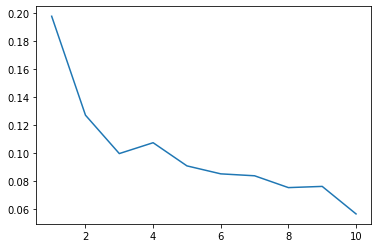

In [12]:
#å bare skrive df er det samme som å skrive display eller print. finnes annen måte:
#skrive predikatet og lagre i variabel
#her vet python at to == er viktigere enn ett enkelt =

#skal bare bruke variabel en gang, så kan inline den
#her ser vi bare verdiene av score blant alle mennene, men det vi vil ha er å se hvorofte hver verdi opptrer
#første rad er hvor ofte score 1 kommer, osv
#ved å skrive normalize = True inne i parentes får vi andel i stedet for antall

df[df.sex == "Male"].predicted_score.value_counts(normalize = True).sort_index().plot()

<AxesSubplot:>

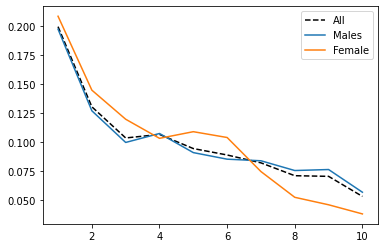

In [13]:
#vi får dette riktig ved å gjøre tallene i kolonnen om til en ny df. må plotte selve dataframen
#vi forventer å se at tallene opp til ti ligger langs x-aksen. forventer flest som får lave verdier, fordi
#de er arrestert for små forbrytelser. Her får vi samme plot som over, men med males. I forrige celle hadde vi .index som 
#en del av kolonnen, men nå er denne flyttet til dataframen slik at den sorterer alle kollonnen samtidig.
#gjør mer effektiv

pd.DataFrame({
    "All": df.predicted_score.value_counts(normalize = True),
    "Males": df[df.sex == "Male"].predicted_score.value_counts(normalize = True),
    "Female": df[df.sex == "Female"].predicted_score.value_counts(normalize = True)
}).sort_index().plot(style = {"All": "k--"})

<AxesSubplot:>

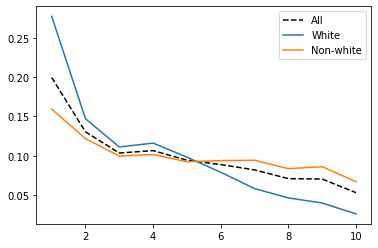

In [14]:
#her setter vi df.white == True, fordi df.white har true eler false verdier. 
#men, true og false r spesielle verdier i python, fordi indikerer sant eller usant uttrykk. dette
#er hva vi har ment med det vi har snakket op pred tidligere. 
#pga når vi gjør testen df.white == True, så er result enten true eller false avhengid av hva verdi til df.white er
#så dermed ingen vits i å sjekke om svaret er true, fordi det vil være true kun gitt at df.white er true. 
#man får bare ut det df.white var til å begynne med
#bruker tilde, som betyr negering forran df.white på kolonne "non-white"

pd.DataFrame({
    "All": df.predicted_score.value_counts(normalize = True),
    "White": df[df.white].predicted_score.value_counts(normalize = True),
    "Non-white": df[~df.white].predicted_score.value_counts(normalize = True)
}).sort_index().plot(style = {"All": "k--"})

<AxesSubplot:title={'center':'Score distribution by recid/non-recid'}>

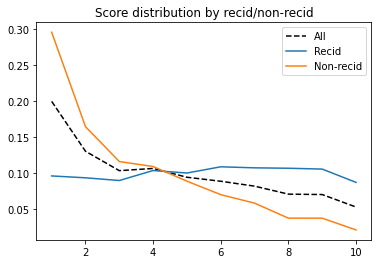

In [15]:
#her setter vi df.white == True, fordi df.white har true eler false verdier. 
#men, true og false r spesielle verdier i python, fordi indikerer sant eller usant uttrykk. dette
#er hva vi har ment med det vi har snakket op pred tidligere. 
#pga når vi gjør testen df.white == True, så er result enten true eller false avhengid av hva verdi til df.white er
#så dermed ingen vits i å sjekke om svaret er true, fordi det vil være true kun gitt at df.white er true. 
#man får bare ut det df.white var til å begynne med
#bruker tilde, som betyr negering forran df.white på kolonne "non-white"

pd.DataFrame({
    "All": df.predicted_score.value_counts(normalize = True),
    "Recid": df[df.actual].predicted_score.value_counts(normalize = True),
    "Non-recid": df[~df.actual].predicted_score.value_counts(normalize = True)
}).sort_index().plot(title = 'Score distribution by recid/non-recid', style = {"All": "k--"})

<AxesSubplot:title={'center':'Score distribution of whites by recid/non-recid'}>

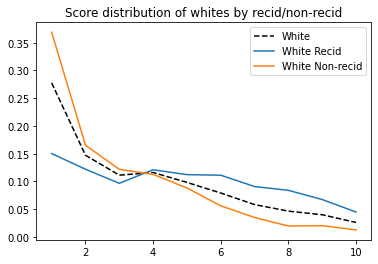

In [16]:
#her setter vi df.white == True, fordi df.white har true eler false verdier. 
#men, true og false r spesielle verdier i python, fordi indikerer sant eller usant uttrykk. dette
#er hva vi har ment med det vi har snakket op pred tidligere. 
#pga når vi gjør testen df.white == True, så er result enten true eller false avhengid av hva verdi til df.white er
#så dermed ingen vits i å sjekke om svaret er true, fordi det vil være true kun gitt at df.white er true. 
#man får bare ut det df.white var til å begynne med
#bruker tilde, som betyr negering forran df.white på kolonne "non-white"

pd.DataFrame({
    "White": df[df.white].predicted_score.value_counts(normalize = True),
    "White Recid": df[df.white & df.actual].predicted_score.value_counts(normalize = True),
    "White Non-recid": df[df.white & ~df.actual].predicted_score.value_counts(normalize = True)
}).sort_index().plot(title = 'Score distribution of whites by recid/non-recid', style = {"White": "k--"})

<AxesSubplot:title={'center':'Score distribution of whites by recid/non-recid'}>

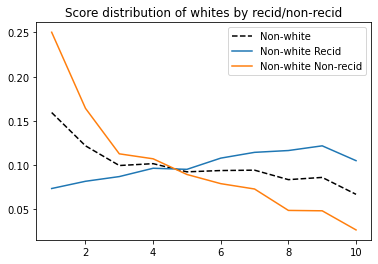

In [17]:
pd.DataFrame({
    "Non-white": df[~df.white].predicted_score.value_counts(normalize = True),
    "Non-white Recid": df[~df.white & df.actual].predicted_score.value_counts(normalize = True),
    "Non-white Non-recid": df[~df.white & ~df.actual].predicted_score.value_counts(normalize = True)
}).sort_index().plot(title = 'Score distribution of whites by recid/non-recid', style = {"Non-white": "k--"})